In [1]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os


os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"

In [2]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")


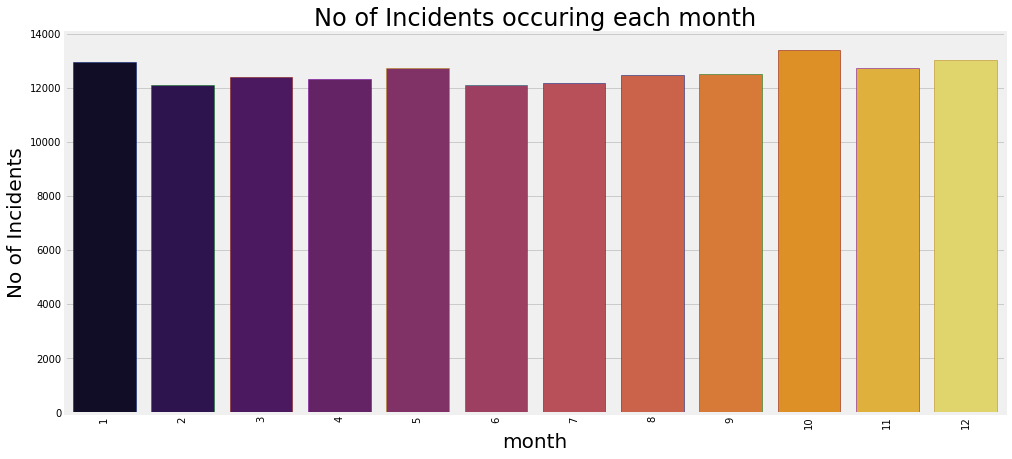

In [3]:
QUERY = """
   SELECT extract(month from incidents_tbl.TIMESTAMP) as month,count(incidents_tbl.unique_key) as no_of_incidents FROM `bigquery-public-data.san_francisco.sfpd_incidents` as incidents_tbl
where EXTRACT(YEAR FROM incidents_tbl.TIMESTAMP)=2016
group by month
order by month asc

        """
df_crime = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='month',y='no_of_incidents',data=df_crime,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('No of Incidents', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('month', fontsize=20)
plt.title('No of Incidents occuring each month', fontsize=24)
plt.show()

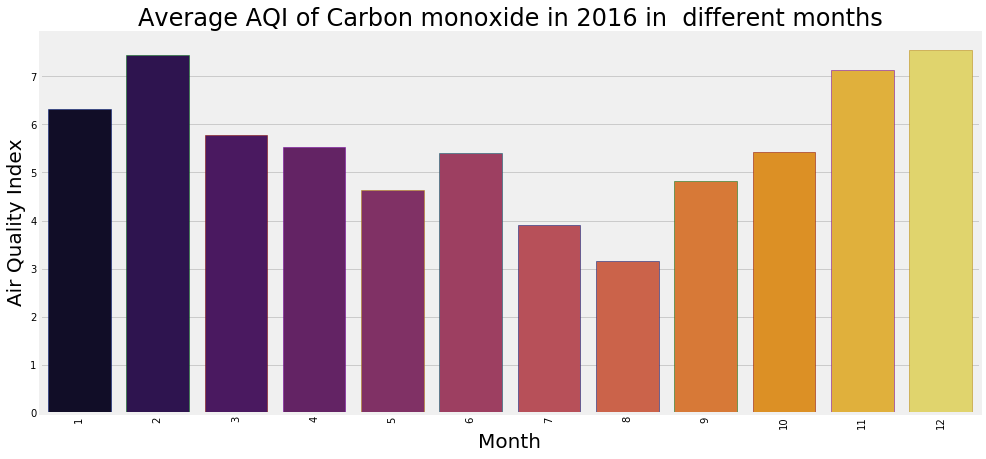

In [4]:
QUERY = """
   SELECT EXTRACT(month FROM co_summary.date_local) as month,avg(co_summary.aqi) as avg_aqi
FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary` as co_summary
where state_name ="California" AND city_name="San Francisco" and  EXTRACT(YEAR FROM co_summary.date_local)=2016
group by month
order by month asc
        """
df_co_month = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='month',y='avg_aqi',data=df_co_month,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=20)
plt.title('Average AQI of Carbon monoxide in 2016 in  different months', fontsize=24)
plt.show()

In [5]:
df_crime

,month,no_of_incidents
0,1,12967
1,2,12106
2,3,12380
3,4,12328
4,5,12732
5,6,12096
6,7,12191
7,8,12471
8,9,12499
9,10,13388


In [6]:
df_co_month

,month,avg_aqi
0,1,6.322581
1,2,7.448276
2,3,5.774194
3,4,5.533333
4,5,4.645161
5,6,5.400000
6,7,3.903226
7,8,3.161290
8,9,4.833333
9,10,5.419355


In [7]:
merged_df=pd.merge(left=df_crime, right=df_co_month, on="month", how="inner")


In [8]:
merged_df

,month,no_of_incidents,avg_aqi
0,1,12967,6.322581
1,2,12106,7.448276
2,3,12380,5.774194
3,4,12328,5.533333
4,5,12732,4.645161
5,6,12096,5.400000
6,7,12191,3.903226
7,8,12471,3.161290
8,9,12499,4.833333
9,10,13388,5.419355


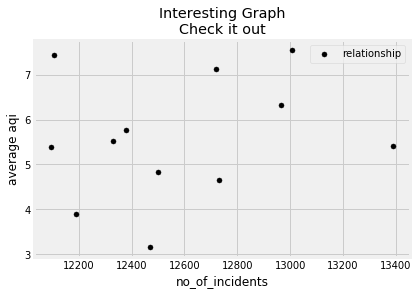

In [10]:

plt.scatter(merged_df['no_of_incidents'],merged_df['avg_aqi'], label='relationship', color='k', s=25, marker="o")

plt.xlabel('no_of_incidents')
plt.ylabel('average aqi')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()